API Test Notebook


In [49]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from requests import Session
import json
import pandas as pd

df = pd.DataFrame()


url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '91f050c2-0c09-49cd-8899-3fd0ba4990b3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-20T19:12:05.652Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 9876}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11779, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [51]:
type(data)

dict

In [53]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [55]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977051e+07,1.977051e+07,False,NaN,1,NaN,NaN,None,2024-10-20T19:09:00.000Z,68571.273195,1.532210e+10,-4.7546,-0.096447,0.586843,9.640861,9.108132,12.223290,1.524889,1.355689e+12,57.3712,1.439997e+12,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
1,1027,Ethereum,ETH,ethereum,9435,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203895e+08,1.203895e+08,True,NaN,2,NaN,NaN,None,2024-10-20T19:09:00.000Z,2699.753261,1.163673e+10,26.3763,-0.022783,2.235790,10.202261,6.141521,1.998764,-22.298555,3.250219e+11,13.7560,3.250219e+11,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
2,825,Tether USDt,USDT,tether,100749,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.201690e+11,1.213629e+11,True,NaN,3,NaN,NaN,None,2024-10-20T19:09:00.000Z,1.000297,3.915440e+10,15.9688,0.056597,0.036465,0.040331,0.025721,-0.002230,0.001019,1.202046e+11,5.0869,1.213989e+11,None,2024-10-20T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-21 00:42:16.407817
3,1839,BNB,BNB,bnb,2264,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.456566e+08,1.456566e+08,False,NaN,4,NaN,NaN,None,2024-10-20T19:09:00.000Z,598.497876,1.495495e+09,3.2624,-0.095628,0.318452,5.160274,5.595280,5.876348,0.719568,8.717519e+10,3.6896,8.717519e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.699215e+08,5.868460e+08,True,NaN,5,NaN,NaN,None,2024-10-20T19:09:00.000Z,160.175334,2.007199e+09,56.3480,-0.131199,2.719966,9.893898,9.509169,11.996946,-11.533619,7.526983e+10,3.1853,9.399825e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
5,3408,USDC,USDC,usd-coin,22568,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.501826e+10,3.501826e+10,False,NaN,6,NaN,NaN,None,2024-10-20T19:09:00.000Z,1.000381,2.773414e+09,-7.2768,0.044588,0.050502,0.032780,0.035768,0.033279,0.039854,3.503160e+10,1.4827,3.503160e+10,None,2024-10-20T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-21 00:42:16.407817
6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.670644e+10,9.998712e+10,False,NaN,7,NaN,NaN,None,2024-10-20T19:09:00.000Z,0.544314,6.220960e+08,-0.1877,0.067605,0.467735,3.323055,-6.525511,-9.801469,-12.335742,3.086612e+10,1.3062,5.443142e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
7,74,Dogecoin,DOGE,dogecoin,1084,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.464491e+11,1.464491e+11,True,NaN,8,NaN,NaN,None,2024-10-20T19:09:00.000Z,0.140618,1.460074e+09,-21.9804,-0.207479,0.493944,28.047662,34.225896,32.892345,0.171163,2.059345e+10,0.8715,2.059345e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
8,1958,TRON,TRX,tron,1054,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.651613e+10,8.651613e+10,True,

In [57]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '91f050c2-0c09-49cd-8899-3fd0ba4990b3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
# I had to go in and put "jupyter notebook --Notebook.iopub_dat_rate_limit=1e10"
# Into the anaconda prompt to change this to allow to pull data
    df_new = pd.json_normalize(data['data'])
    df_new['timestamp'] = pd.to_datetime('now')

        # Append the new data to the global DataFrame (which already holds previous data)
    global df
    df = pd.concat([df, df_new])

    if not os.path.isfile(r'C:\Users\Lenovo\OneDrive\Desktop\Python Pandas\API.csv'): # Here we are checking if there is another file named API.csv in this location
        df.to_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Python Pandas\API.csv',header='column_names') # if not then this file gets createdand header will be the column name
    else:
        df.to_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Python Pandas\API.csv',header=False) # here header is false because we dont want to creater header theat is column name after each loop
        
    

In [59]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(10) # Sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [61]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977051e+07,1.977051e+07,False,NaN,1,NaN,NaN,None,2024-10-20T19:09:00.000Z,68571.273195,1.532210e+10,-4.7546,-0.096447,0.586843,9.640861,9.108132,12.223290,1.524889,1.355689e+12,57.3712,1.439997e+12,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
1,1027,Ethereum,ETH,ethereum,9435,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203895e+08,1.203895e+08,True,NaN,2,NaN,NaN,None,2024-10-20T19:09:00.000Z,2699.753261,1.163673e+10,26.3763,-0.022783,2.235790,10.202261,6.141521,1.998764,-22.298555,3.250219e+11,13.7560,3.250219e+11,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
2,825,Tether USDt,USDT,tether,100749,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.201690e+11,1.213629e+11,True,NaN,3,NaN,NaN,None,2024-10-20T19:09:00.000Z,1.000297,3.915440e+10,15.9688,0.056597,0.036465,0.040331,0.025721,-0.002230,0.001019,1.202046e+11,5.0869,1.213989e+11,None,2024-10-20T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-21 00:42:16.407817
3,1839,BNB,BNB,bnb,2264,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.456566e+08,1.456566e+08,False,NaN,4,NaN,NaN,None,2024-10-20T19:09:00.000Z,598.497876,1.495495e+09,3.2624,-0.095628,0.318452,5.160274,5.595280,5.876348,0.719568,8.717519e+10,3.6896,8.717519e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.699215e+08,5.868460e+08,True,NaN,5,NaN,NaN,None,2024-10-20T19:09:00.000Z,160.175334,2.007199e+09,56.3480,-0.131199,2.719966,9.893898,9.509169,11.996946,-11.533619,7.526983e+10,3.1853,9.399825e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
5,3408,USDC,USDC,usd-coin,22568,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.501826e+10,3.501826e+10,False,NaN,6,NaN,NaN,None,2024-10-20T19:09:00.000Z,1.000381,2.773414e+09,-7.2768,0.044588,0.050502,0.032780,0.035768,0.033279,0.039854,3.503160e+10,1.4827,3.503160e+10,None,2024-10-20T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-21 00:42:16.407817
6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.670644e+10,9.998712e+10,False,NaN,7,NaN,NaN,None,2024-10-20T19:09:00.000Z,0.544314,6.220960e+08,-0.1877,0.067605,0.467735,3.323055,-6.525511,-9.801469,-12.335742,3.086612e+10,1.3062,5.443142e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
7,74,Dogecoin,DOGE,dogecoin,1084,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.464491e+11,1.464491e+11,True,NaN,8,NaN,NaN,None,2024-10-20T19:09:00.000Z,0.140618,1.460074e+09,-21.9804,-0.207479,0.493944,28.047662,34.225896,32.892345,0.171163,2.059345e+10,0.8715,2.059345e+10,None,2024-10-20T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-21 00:42:16.407817
8,1958,TRON,TRX,tron,1054,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.651613e+10,8.651613e+10,True,

In [88]:

df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean('quote.USD.percent_change_1h')
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.24727,0.03026,8.92331,7.62144,14.59691,1.54020
Ethereum,0.13660,0.21378,7.42059,3.49793,1.83982,-23.99094
Tether USDt,-0.00122,-0.00499,0.02320,-0.03442,-0.03222,-0.03754
BNB,0.18463,-0.05322,4.26640,4.40110,6.26105,0.62622
Solana,0.15555,2.84360,8.69131,5.84109,10.98590,-11.01310
USDC,0.00069,0.00050,0.01333,-0.01731,-0.00345,-0.00986
XRP,0.06664,-0.99122,0.97084,-7.88753,-9.38389,-9.24004
Dogecoin,1.26378,-1.02066,28.60402,34.38048,36.83657,3.85133
TRON,0.07142,-1.05522,-3.65022,2.74440,-2.17554,14.96029


In [90]:
df4 = df3.stack() # now if u see a type of d4 it will be series its no longer a data frame
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     0.24727
              quote.USD.percent_change_24h    0.03026
              quote.USD.percent_change_7d     8.92331
              quote.USD.percent_change_30d    7.62144
              quote.USD.percent_change_60d   14.59691
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h   -1.19829
              quote.USD.percent_change_7d    10.30388
              quote.USD.percent_change_30d    5.29401
              quote.USD.percent_change_60d    6.10958
              quote.USD.percent_change_90d   -7.53078
Length: 90, dtype: float64

In [92]:
type(df4) # so we want to get it back to dataframe

pandas.core.series.Series

In [94]:
df5 = df4.to_frame(name = 'values') # here name is acting like a index we dont want it like that
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h   0.24727
             quote.USD.percent_change_24h  0.03026
             quote.USD.percent_change_7d   8.92331
             quote.USD.percent_change_30d  7.62144
             quote.USD.percent_change_60d 14.59691
...                                            ...
Bitcoin Cash quote.USD.percent_change_24h -1.19829
             quote.USD.percent_change_7d  10.30388
             quote.USD.percent_change_30d  5.29401
             quote.USD.percent_change_60d  6.10958
             quote.USD.percent_change_90d -7.53078

[90 rows x 1 columns]

In [96]:
type(df5)

pandas.core.frame.DataFrame

In [98]:
df5.count()

values    90
dtype: int64

In [100]:
index = pd.Index(range(90))
# df6 = df5.set_index(index) this displays only index number and values
df6 = df5.reset_index()
df6                       
# now we formated exactly for the visualization

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.24727
1,Bitcoin,quote.USD.percent_change_24h,0.03026
2,Bitcoin,quote.USD.percent_change_7d,8.92331
3,Bitcoin,quote.USD.percent_change_30d,7.62144
4,Bitcoin,quote.USD.percent_change_60d,14.59691
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-1.19829
86,Bitcoin Cash,quote.USD.percent_change_7d,10.30388
87,Bitcoin Cash,quote.USD.percent_change_30d,5.29401
88,Bitcoin Cash,quote.USD.percent_change_60d,6.10958


In [102]:
df7 = df6.rename(columns ={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.24727
1,Bitcoin,quote.USD.percent_change_24h,0.03026
2,Bitcoin,quote.USD.percent_change_7d,8.92331
3,Bitcoin,quote.USD.percent_change_30d,7.62144
4,Bitcoin,quote.USD.percent_change_60d,14.59691
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-1.19829
86,Bitcoin Cash,quote.USD.percent_change_7d,10.30388
87,Bitcoin Cash,quote.USD.percent_change_30d,5.29401
88,Bitcoin Cash,quote.USD.percent_change_60d,6.10958


In [106]:
# here we are renaming the name of percent_change colum values
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [68]:
# importng libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

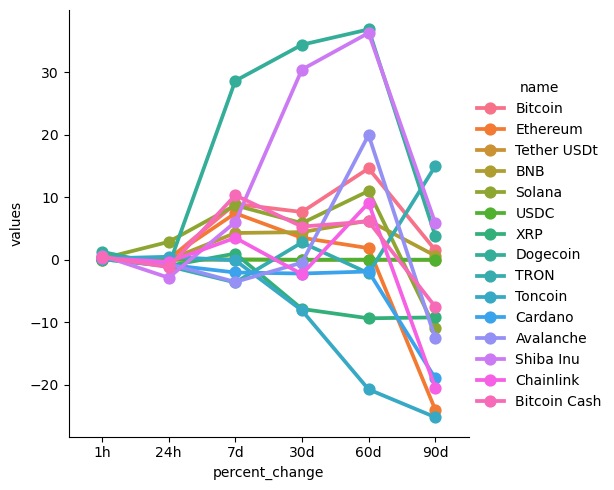

In [110]:
sns.catplot(x ='percent_change' , y = 'values', hue = 'name', data=df7, kind = 'point')

In [64]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,68571.273195,2024-10-21 00:42:16.407817
0,Bitcoin,68571.273195,2024-10-21 00:42:32.352960
0,Bitcoin,68571.273195,2024-10-21 00:42:43.171496
0,Bitcoin,68571.273195,2024-10-21 00:42:53.925873
0,Bitcoin,68571.273195,2024-10-21 00:43:04.651405


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

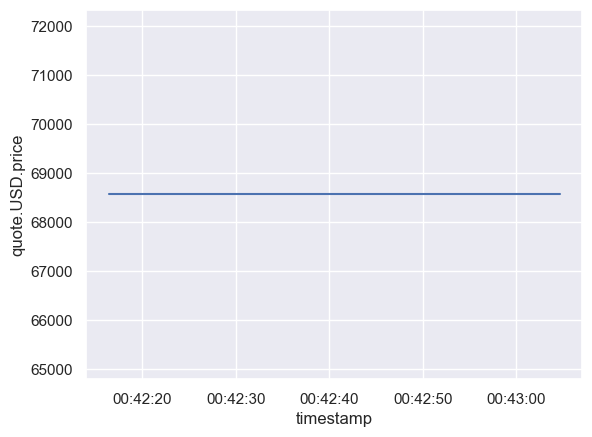

In [70]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp',y = 'quote.USD.price', data = df10)